In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

dataset = pd.read_csv("data/Social_Network.csv")

men_purchased = dataset[(dataset['Gender'] == 'Male') & (dataset['Purchased'] == 1)]
num_men_purchased = len(men_purchased)

print(f"Number of men who made a purchase: {num_men_purchased}")

women_purchased = dataset[(dataset['Gender'] == 'Female') & (dataset['Purchased'] == 1)]
num_women_purchased = len(women_purchased)

print(f"Number of women who made a purchase: {num_women_purchased}")

Number of men who made a purchase: 66
Number of women who made a purchase: 77


In [2]:
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

#                   Predicted Negative	Predicted Positive
# Actual Negative	True Negative (TN)	False Positive (FP)
# Actual Positive	False Negative (FN)	True Positive (TP)

print("Accuracy:" ,((57+17) / (57+1+5+17)) * 100, "%")


[[57  1]
 [ 5 17]]
Accuracy: 92.5 %


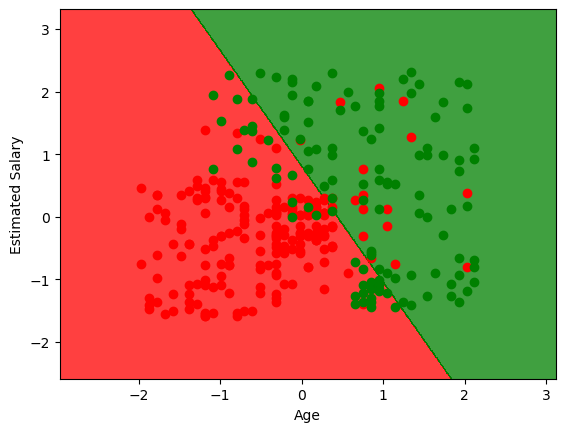

In [10]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),

                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2,

             classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,

             cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.show()


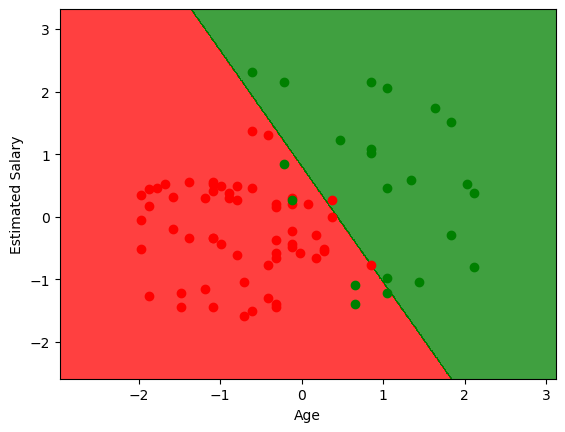

In [11]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),

                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2,

             classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,

             cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.show()
